In [308]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


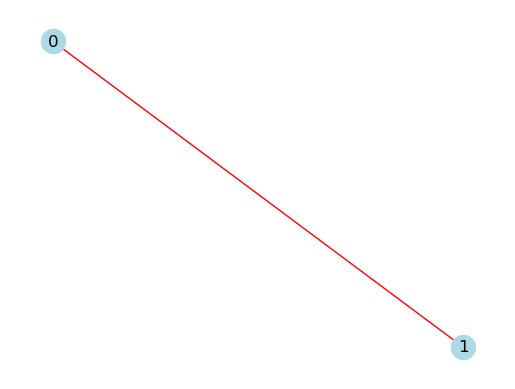

In [267]:
G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(1, 2, periodic=True))
nx.set_edge_attributes(G, values=-1, name='weight')
# nx.set_edge_attributes(G, values=-1.7, name='weight')
fig, ax = plt.subplots()
eclist = ['r' if e[2]['weight'] < 0 else 'k' for e in list(G.edges(data=True))]
nx.draw(G, ax=ax, with_labels=True, edge_color=eclist, node_color='lightblue')

In [268]:
adj = nx.adjacency_matrix(G).toarray()
sadj = np.zeros(adj.shape)
sadj[np.where(adj < 0)] = adj[np.where(adj < 0)]
lapl = nx.laplacian_matrix(G).toarray()
sdeg = np.diag(np.abs(adj).sum(axis=1))
sdeg2 = np.diag(np.abs(sadj).sum(axis=1))

slapl = sdeg - adj
eigv, eigV = np.linalg.eigh(slapl)


/tmp/ipykernel_7595/2410010228.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [275]:
status_array = np.array([0.5, -1])
status = []
status.append(status_array)
for i in range(70):
    status_array = status_array - 1./10*(slapl@status_array)
    status.append(status_array)

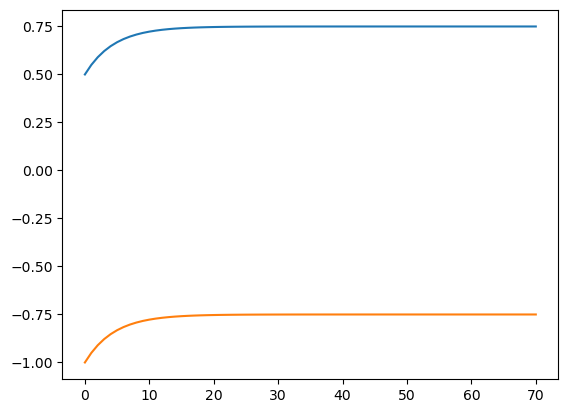

In [276]:
plt.plot(np.array(status)[:, 0])
plt.plot(np.array(status)[:, 1])

In [311]:
G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(1, 3, periodic=True))
nx.set_edge_attributes(G, values=1, name='weight')
# nx.set_edge_attributes(G, values=-1.7, name='weight')
# nx.set_edge_attributes(G, values={(0, 1): -1}, name='weight')

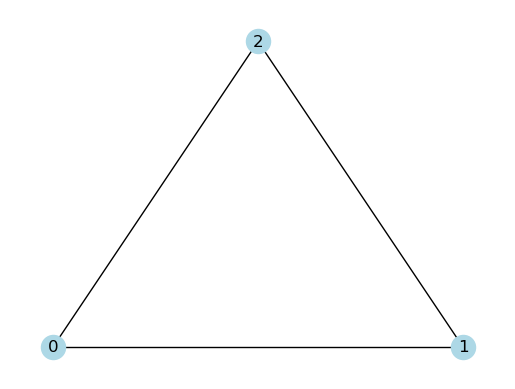

In [312]:
fig, ax = plt.subplots()
pos = {0: (0, 0), 1: (1, 0), 2: (0.5, np.sqrt(3)/2)}
eclist = ['r' if e[2]['weight'] < 0 else 'k' for e in list(G.edges(data=True))]
nx.draw(G, ax=ax, pos=pos, with_labels=True, edge_color=eclist, node_color='lightblue')

In [313]:
adj = nx.adjacency_matrix(G).toarray()
sadj = np.zeros(adj.shape)
sadj[np.where(adj < 0)] = adj[np.where(adj < 0)]
lapl = nx.laplacian_matrix(G).toarray()
sdeg = np.diag(np.abs(adj).sum(axis=1))
sdeg2 = np.diag(np.abs(sadj).sum(axis=1))

slapl = sdeg - adj
eigv, eigV = np.linalg.eigh(slapl)


/tmp/ipykernel_7595/2410010228.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [314]:
eigv

array([0., 3., 3.])

In [324]:
status_array = np.array([-1, 1, 0.5])
status = []
status.append(status_array)
for i in range(70):
    status_array = status_array - 1./10*(slapl@status_array)
    status.append(status_array)

[(0, (0, 0)), (1, (1, 0)), (2, (0.5, 0.8660254037844386))]

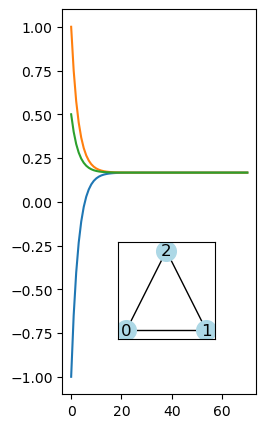

In [390]:
fig, ax1 = plt.subplots(figsize=(2.5,5))

ax1.plot(np.array(status)[:, 0])
ax1.plot(np.array(status)[:, 1])
ax1.plot(np.array(status)[:, 2])


axins = inset_axes(ax1, width="50%", height="25%", loc=3, borderpad=4)

nx.draw(G, ax=axins, pos=pos, with_labels=True, edge_color=eclist, node_color='lightblue', node_size=200)
axins.set_axis_on()
# plt.yscale('symlog')

In [389]:
nx.rescale_layout_dict(pos=pos, scale=.5)

{0: array([-0.4330127, -0.25     ]),
 1: array([ 0.4330127, -0.25     ]),
 2: array([0. , 0.5])}

In [380]:
nx.rescale_layout_dict(pos=pos, scale=1)

{0: array([-0.8660254, -0.5      ]),
 1: array([ 0.8660254, -0.5      ]),
 2: array([0., 1.])}

In [328]:
np.array(status)[:, 1]/np.array(status)[:, 2]

array([2.        , 1.875     , 1.74242424, 1.61032028, 1.48662343,
       1.37736315, 1.2857181 , 1.21212422, 1.15506559, 1.11202   ,
       1.08021105, 1.05706315, 1.04040534, 1.02851416, 1.02007439,
       1.01410872, 1.00990405, 1.0069466 , 1.00486938, 1.00341189,
       1.00238995, 1.00167377, 1.00117203, 1.00082061, 1.00057452,
       1.00040221, 1.00028157, 1.00019711, 1.00013798, 1.00009659,
       1.00006761, 1.00004733, 1.00003313, 1.00002319, 1.00001623,
       1.00001136, 1.00000796, 1.00000557, 1.0000039 , 1.00000273,
       1.00000191, 1.00000134, 1.00000094, 1.00000066, 1.00000046,
       1.00000032, 1.00000022, 1.00000016, 1.00000011, 1.00000008,
       1.00000005, 1.00000004, 1.00000003, 1.00000002, 1.00000001,
       1.00000001, 1.00000001, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [327]:
np.mean(status[0]), status[-1]

(0.16666666666666666, array([0.16666667, 0.16666667, 0.16666667]))

In [2]:
L = 10
# G = nx.grid_2d_graph(10, 10, periodic=True)
G = nx.erdos_renyi_graph(10, 0.1)
N = G.number_of_nodes()
nx.set_edge_attributes(G, values=1, name='weight')
neg_weights = {e: 10 for i,e in enumerate(G.edges()) if i ==1}
nx.set_edge_attributes(G, values=neg_weights, name='weight')
lapl1 = nx.laplacian_matrix(G).toarray()
neg_weights = {e: -10 for i,e in enumerate(G.edges()) if i ==1}
nx.set_edge_attributes(G, values=neg_weights, name='weight')

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [3]:
adj = nx.adjacency_matrix(G).toarray()
sadj = np.zeros(adj.shape)
sadj[np.where(adj < 0)] = adj[np.where(adj < 0)]
lapl = nx.laplacian_matrix(G).toarray()
sdeg = np.diag(np.abs(adj).sum(axis=1))
sdeg2 = np.diag(np.abs(sadj).sum(axis=1))

slapl = sdeg - adj

/tmp/ipykernel_3843/2547320483.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()


In [4]:
((slapl) - ( lapl1 - (2*sadj))).sum()

0.0

In [121]:
sadj

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])